In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("wine_data.csv")

(array([17854., 18332., 18414., 18270., 18454.,  5406.,   577.,   617.,
          598.,   478.]),
 array([ 4.00006644,  6.27458013,  8.54909382, 10.82360751, 13.0981212 ,
        15.37263489, 17.64714858, 19.92166227, 22.19617596, 24.47068965,
        26.74520334]),
 <BarContainer object of 10 artists>)

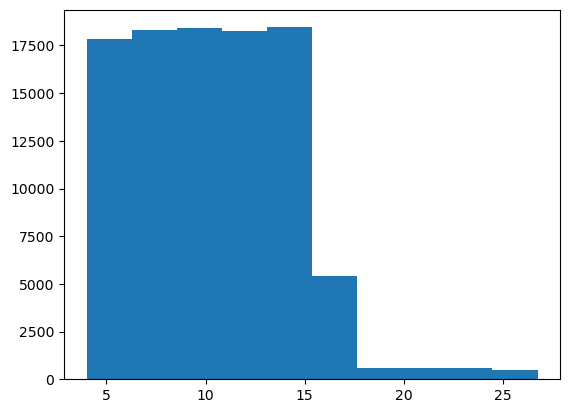

In [3]:
plt.hist(data= df,x="fixed_acidity")

In [4]:
df.sample(25)

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,color,region,grape_variety,vintage_year,quality
8640,8643,9.431372,0.519587,0.624173,14.871429,0.259921,31.248721,38.780723,0.991228,2.839766,1.914511,red,Bordeaux,Syrah,2020,high
43504,43703,14.024348,0.698998,0.985592,2.529963,0.186108,63.025228,104.578103,0.991683,3.743433,1.206525,White,Bordeaux,Chardonnay,2019,medium
45248,45461,9.517698,0.618184,0.647325,6.391407,0.526429,30.324016,95.951473,0.998212,3.952592,0.626709,white,Napa Valley,Cabernet Sauvignon,2020,low
57544,57867,7.548745,0.849506,0.926681,14.081048,0.529323,1.340966,201.275531,0.995905,3.859448,0.970396,Red,Bordeaux,cabernet,2017,medium
51227,51482,14.739109,0.568231,0.916242,6.438584,0.440859,43.608896,225.387650,0.992897,2.900471,0.883753,white,bordeaux,Pinot Noir,2020,high
22934,22984,7.785044,0.675822,0.539822,7.303377,0.244708,30.372068,86.237908,0.995536,3.172488,1.494822,white,Bordeaux,Pinot Noir,2019,low
55437,55742,8.188385,0.720247,0.893261,6.502821,0.040939,66.438388,196.260974,0.993267,2.823004,0.750682,White,Tuscany,Chardonnay,2017,medium
35863,35991,12.009859,1.033866,0.334174,6.229351,0.397499,27.846233,174.559857,0.996943,3.129247,1.084838,Red,Tuscany,Cabernet Sauvignon,2020,high
71809,72341,22.818122,0.859043,0.937960,3.216684,0.528259,16.619226,123.233520,0.992464,3.617204,1.961508,white,Bordeaux,Cabernet Sauvignon,2020,medium
51992,52260,6.645684,0.977145,0.994691,7.405272,0.458757,2.663722,123.210822,0.997579,3.887530,1.316613,red,Napa Valley,Pinot Noir,2020,high


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   fixed_acidity         99000 non-null   float64
 2   volatile_acidity      99000 non-null   float64
 3   citric_acid           100000 non-null  float64
 4   residual_sugar        100000 non-null  float64
 5   chlorides             100000 non-null  float64
 6   free_sulfur_dioxide   100000 non-null  float64
 7   total_sulfur_dioxide  100000 non-null  float64
 8   density               100000 non-null  float64
 9   pH                    100000 non-null  float64
 10  sulphates             100000 non-null  float64
 11  color                 99000 non-null   object 
 12  region                99000 non-null   object 
 13  grape_variety         100000 non-null  object 
 14  vintage_year          100000 non-null  int64  
 15  q

In [6]:
df.isnull().sum()

Unnamed: 0                 0
fixed_acidity           1000
volatile_acidity        1000
citric_acid                0
residual_sugar             0
chlorides                  0
free_sulfur_dioxide        0
total_sulfur_dioxide       0
density                    0
pH                         0
sulphates                  0
color                   1000
region                  1000
grape_variety              0
vintage_year               0
quality                    0
dtype: int64

In [10]:
numeric_null = df[["fixed_acidity","volatile_acidity"]]
numeric_null

,fixed_acidity,volatile_acidity
0,9.545971,1.119034
1,10.507966,0.432228
2,7.353309,1.073555
3,4.632620,0.520863
4,4.971561,0.703143
...,...,...
99995,7.232601,0.608386
99996,5.129761,0.359503
99997,13.127022,0.175020
99998,13.377078,0.726480


In [19]:
imputer = KNNImputer(n_neighbors=3, weights='distance')


a= imputer.fit_transform(numeric_null)
df1=pd.DataFrame(a,columns=numeric_null.columns)

<Axes: ylabel='Frequency'>

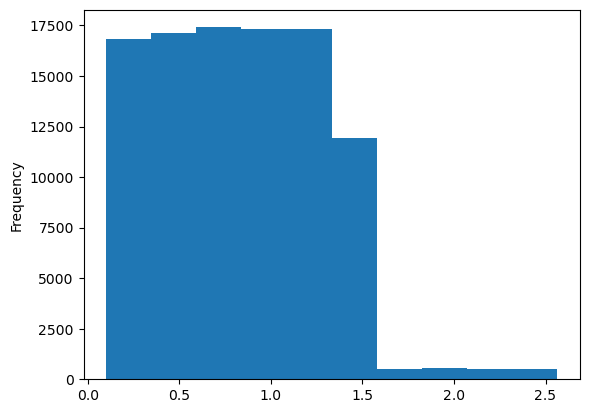

In [14]:
pd.DataFrame(a,columns=numeric_null.columns)['volatile_acidity'].plot(kind='hist')

In [20]:
df["fixed_acidity"] = df1["fixed_acidity"]

In [23]:
df['volatile_acidity']  = df1["volatile_acidity"]

In [24]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa Valley', 'napa', 'bordeaux',
       nan], dtype=object)

<Axes: xlabel='region'>

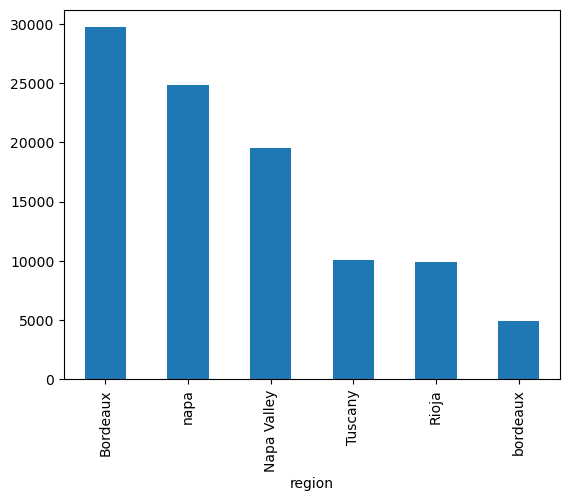

In [28]:
df["region"].value_counts().plot(kind="bar")

In [29]:
df["region"] = df["region"].str.strip().str.title()

df["region"] = df["region"].replace({
    "Napa Valley" : "Napa"
})

<Axes: xlabel='region'>

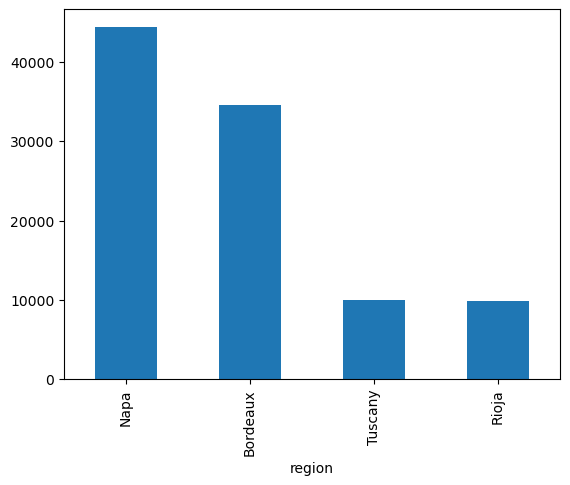

In [30]:
df["region"].value_counts().plot(kind="bar")

In [ ]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa', nan], dtype=object)

In [ ]:
df["color"].unique()

array(['red', 'White', 'Red', nan, 'white', 'RED', 'WHITE'], dtype=object)

In [ ]:
df["color"] = df["color"].str.strip().str.title()

In [ ]:
df["color"].unique()

array(['Red', 'White', nan], dtype=object)

In [31]:
categorical_null = ["region","color"]

for i in categorical_null:
    mo = df[i].mode()[0]
    df[i].fillna(mo,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10428\4245690355.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mo,inplace=True)


<Axes: xlabel='region'>

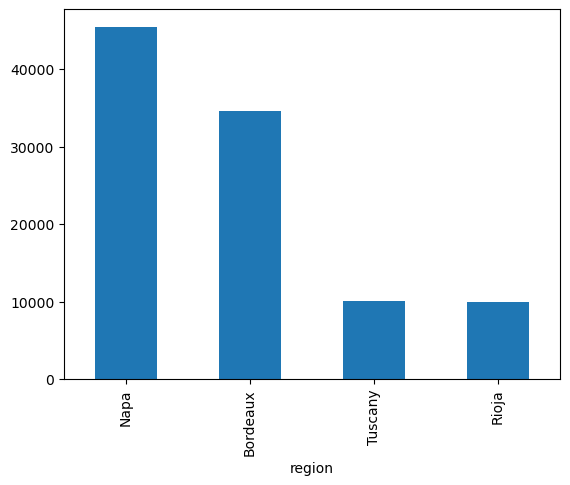

In [32]:
df["region"].value_counts().plot(kind="bar")

In [ ]:
df["region"].unique()

array(['Bordeaux', 'Rioja', 'Tuscany', 'Napa'], dtype=object)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
color                   0
region                  0
grape_variety           0
vintage_year            0
quality                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   fixed_acidity         100000 non-null  float64
 2   volatile_acidity      100000 non-null  float64
 3   citric_acid           100000 non-null  float64
 4   residual_sugar        100000 non-null  float64
 5   chlorides             100000 non-null  float64
 6   free_sulfur_dioxide   100000 non-null  float64
 7   total_sulfur_dioxide  100000 non-null  float64
 8   density               100000 non-null  float64
 9   pH                    100000 non-null  float64
 10  sulphates             100000 non-null  float64
 11  color                 100000 non-null  object 
 12  region                100000 non-null  object 
 13  grape_variety         100000 non-null  object 
 14  vintage_year          100000 non-null  int64  
 15  q

In [ ]:
df.hist(data=df,x=)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df[]

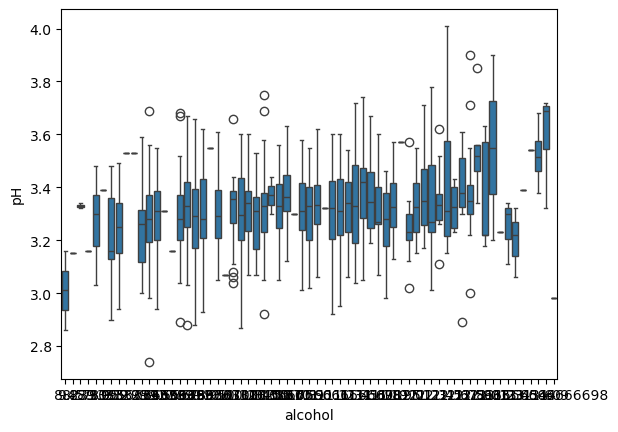

In [ ]:

sns.boxplot(data=df, x='alcohol', y='pH')
plt.show()